In [1]:
import h5py
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
file = "../somedata/umi10000bins/batch0.fast5"

In [3]:
f = h5py.File(file, 'r')

In [4]:
reads = []
for r in f.keys():
    reads.append(f[r])
basecoded = list(map(lambda x: x['Analyses']['Basecall_1D_000']['BaseCalled_template']['Fastq'][()], reads))
raw = list(map(lambda x: x['Raw']['Signal'][()], reads))
reads = zip(basecoded, raw)
# next(reads)[1] # proper way to use iterators
lreads = list(reads) # not exhaustive
len(lreads)

31

In [5]:
def plotGraphAndAvg(lst):
    i=6
    j=3000
    plt.plot(range(len(lst)), lst)
    plt.plot([0,len(lst)],[sum(lst)/len(lst)]*2)

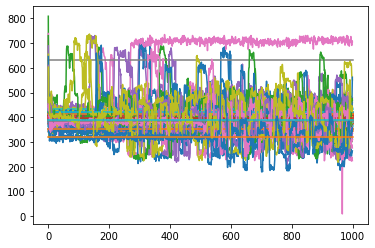

In [6]:
for i in range(len(lreads)):
    j=1000
    plotGraphAndAvg(lreads[i][1][:j])

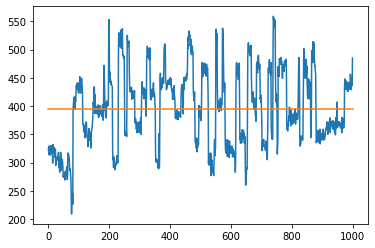

In [8]:
plotGraphAndAvg(lreads[3][1][-1000:])

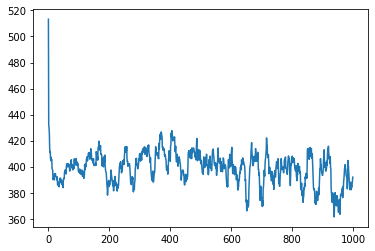

In [5]:

def add(a,b):
    return a+b

def div(a,b):
    return a/b

s = [0]*1000
for r in lreads:
    s = map(add, r[1][:1000], s)
    
s = map(div, s, [len(lreads)]*1000)

plt.plot(list(s))